In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1=pd.read_csv(r"/content/iraste_nxt_cas.csv")
d2=pd.read_csv(r"/content/iraste_nxt_casdms.csv")

In [3]:
d1

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-05-01,00:00:06,14.196872,77.631213,3829.0,58.0
1,cas_ldw,2022-05-01,00:00:07,16.511887,80.746034,8111.0,56.0
2,cas_ldw,2022-05-01,00:00:11,17.908537,78.464064,1153.0,74.0
3,cas_ldw,2022-05-01,00:00:11,13.152203,77.620431,7103.0,72.0
4,cas_ldw,2022-05-01,00:00:15,16.512134,80.748452,8111.0,57.0
...,...,...,...,...,...,...,...
131875,cas_ldw,2022-05-04,13:42:13,17.163425,79.531302,4123.0,70.0
131876,cas_ldw,2022-05-04,13:42:15,17.279652,78.793532,3899.0,55.0
131877,cas_ldw,2022-05-04,13:42:25,17.279467,78.792212,3899.0,61.0
131878,cas_hmw,2022-05-04,13:42:26,17.228949,78.977112,6152.0,58.0


In [4]:
d2

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_hmw,2022-05-01,00:00:29,17.158688,79.306623,3867,55
1,cas_ldw,2022-05-01,00:00:52,17.158928,79.309335,3867,60
2,cas_ldw,2022-05-01,00:01:03,17.159078,79.310747,3867,67
3,cas_ldw,2022-05-01,00:01:16,17.159457,79.314245,3867,73
4,cas_ldw,2022-05-01,00:01:27,16.814285,80.246173,6123,61
...,...,...,...,...,...,...,...
60482,cas_ldw,2022-05-30,23:54:35,17.144550,79.600310,6123,79
60483,cas_ldw,2022-05-30,23:56:21,17.153962,79.609060,6123,60
60484,cas_ldw,2022-05-30,23:56:37,17.155207,79.611777,6123,60
60485,cas_ldw,2022-05-30,23:56:49,17.155805,79.613217,6123,57


In [5]:
df=pd.concat([d1,d2],ignore_index=True)

In [6]:
df

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-05-01,00:00:06,14.196872,77.631213,3829.0,58.0
1,cas_ldw,2022-05-01,00:00:07,16.511887,80.746034,8111.0,56.0
2,cas_ldw,2022-05-01,00:00:11,17.908537,78.464064,1153.0,74.0
3,cas_ldw,2022-05-01,00:00:11,13.152203,77.620431,7103.0,72.0
4,cas_ldw,2022-05-01,00:00:15,16.512134,80.748452,8111.0,57.0
...,...,...,...,...,...,...,...
192362,cas_ldw,2022-05-30,23:54:35,17.144550,79.600310,6123.0,79.0
192363,cas_ldw,2022-05-30,23:56:21,17.153962,79.609060,6123.0,60.0
192364,cas_ldw,2022-05-30,23:56:37,17.155207,79.611777,6123.0,60.0
192365,cas_ldw,2022-05-30,23:56:49,17.155805,79.613217,6123.0,57.0


In [7]:
df.shape

(192367, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192367 entries, 0 to 192366
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Alert    192367 non-null  object 
 1   Date     192367 non-null  object 
 2   Time     192367 non-null  object 
 3   Lat      192367 non-null  float64
 4   Long     192366 non-null  float64
 5   Vehicle  192366 non-null  float64
 6   Speed    192366 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.3+ MB


In [9]:
df.isnull().sum()

Alert      0
Date       0
Time       0
Lat        0
Long       1
Vehicle    1
Speed      1
dtype: int64

In [10]:
df=df.fillna(method='ffill')

In [11]:
df.isnull().sum()

Alert      0
Date       0
Time       0
Lat        0
Long       0
Vehicle    0
Speed      0
dtype: int64

In [12]:
df.duplicated().sum()

109

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Lat,Long,Vehicle,Speed
count,192258.000000,192258.000000,192258.000000,192258.000000
mean,16.934536,79.188302,6036.327061,66.415041
std,0.967255,0.941495,2408.029009,15.467033
min,12.323993,76.659961,132.000000,0.000000
25%,16.725666,78.437215,3899.000000,59.000000
50%,17.158106,79.155157,6123.000000,69.000000
75%,17.279523,79.901932,8122.000000,77.000000
max,19.658568,83.334983,9857.000000,100.000000


In [16]:
df.describe(include="all")

,Alert,Date,Time,Lat,Long,Vehicle,Speed
count,192258,192258,192258,192258.000000,192258.000000,192258.000000,192258.000000
unique,11,30,76917,NaN,NaN,NaN,NaN
top,cas_ldw,2022-05-01,08:12:50,NaN,NaN,NaN,NaN
freq,159564,43042,11,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,16.934536,79.188302,6036.327061,66.415041
std,NaN,NaN,NaN,0.967255,0.941495,2408.029009,15.467033
min,NaN,NaN,NaN,12.323993,76.659961,132.000000,0.000000
25%,NaN,NaN,NaN,16.725666,78.437215,3899.000000,59.000000
50%,NaN,NaN,NaN,17.158106,79.155157,6123.000000,69.000000
75%,NaN,NaN,NaN,17.279523,79.901932,8122.000000,77.000000


In [17]:
df.skew()

<ipython-input-17-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Lat       -1.738510
Long       0.484963
Vehicle   -0.505761
Speed     -1.319177
dtype: float64

If skewness is negative, the distribution is skewed to the left (longer tail on the left side).
If skewness is positive, the distribution is skewed to the right (longer tail on the right side).
If skewness is close to zero, the distribution is approximately symmetric.


In [18]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)

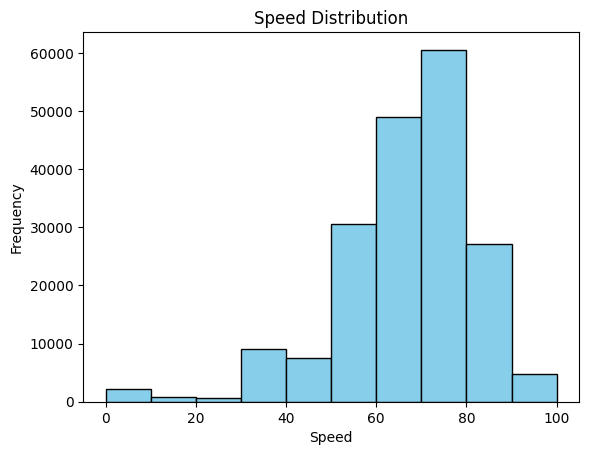

In [19]:
plt.hist(df['Speed'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Speed Distribution')
plt.show()


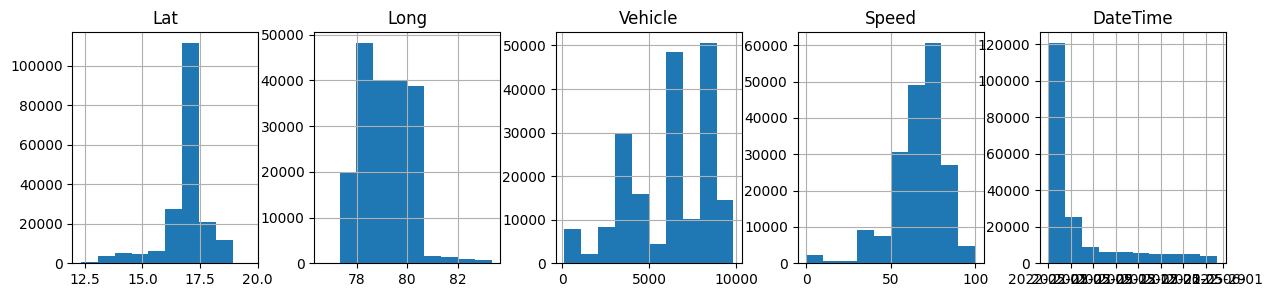

In [20]:
df.hist(layout=(1,6), figsize=(18,3))
plt.show()

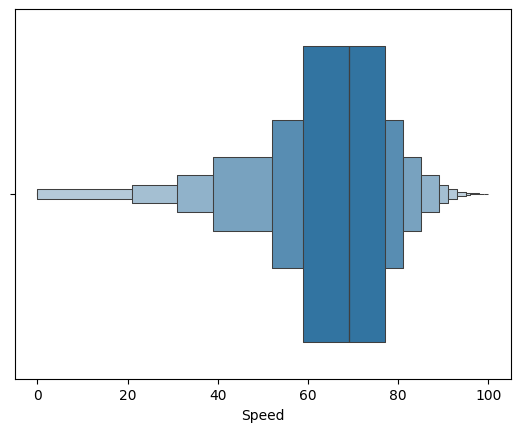

In [21]:
sns.boxenplot(data=df, x='Speed')
plt.show()

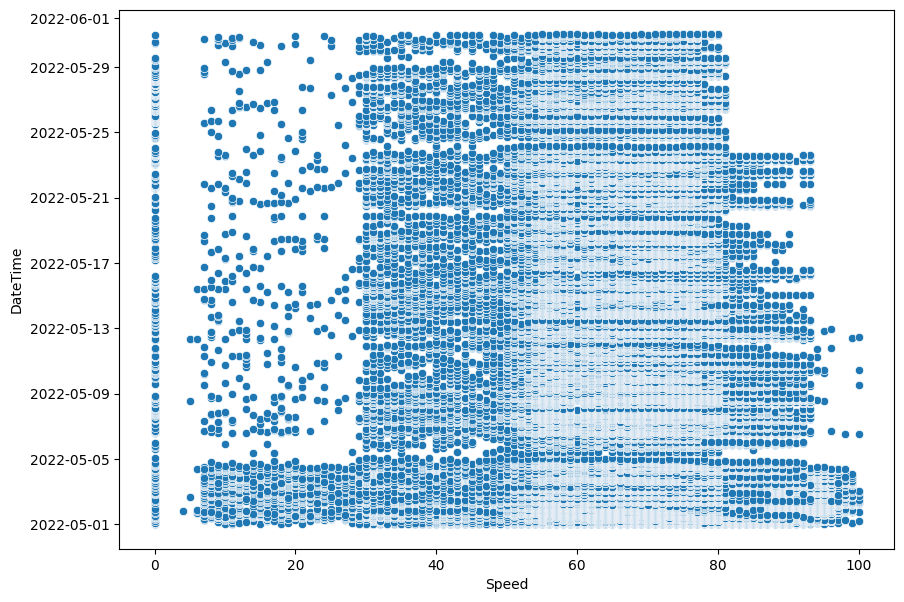

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(y=df['DateTime'], x=df['Speed'])
plt.show()

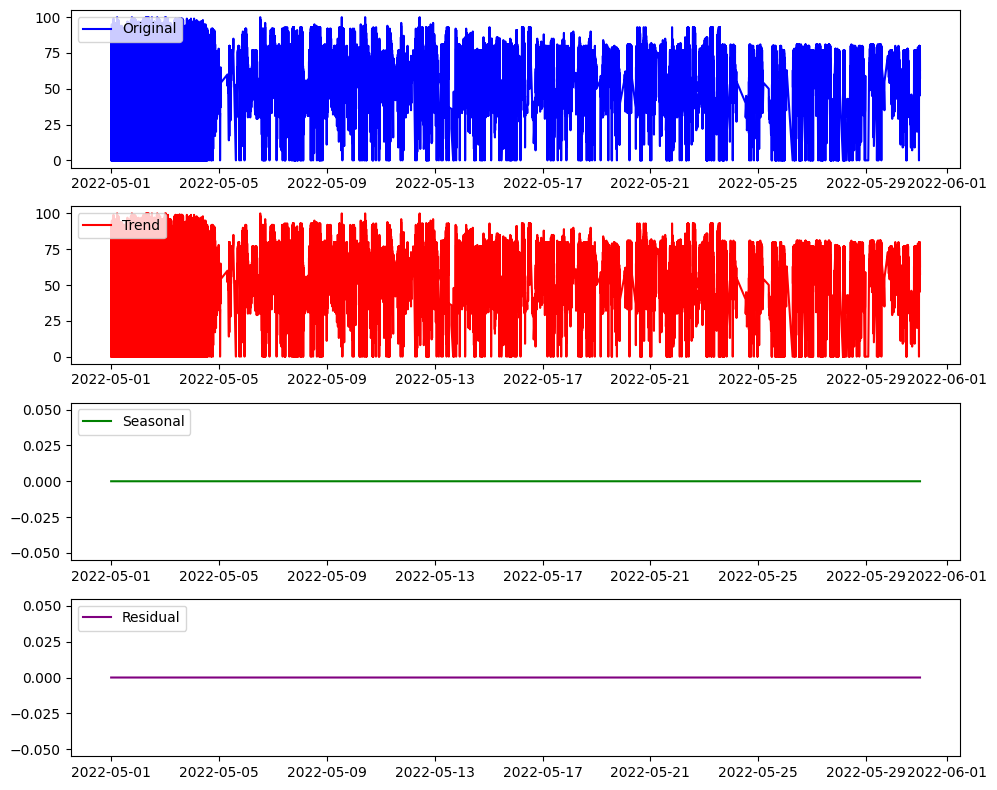

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('DateTime', inplace=True)
decomposition = seasonal_decompose(df['Speed'], model='additive', period=1)

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Speed'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
df

,Alert,Lat,Long,Vehicle,Speed
DateTime,,,,,
2022-05-01 00:00:06,cas_ldw,14.196872,77.631213,3829.0,58.0
2022-05-01 00:00:07,cas_ldw,16.511887,80.746034,8111.0,56.0
2022-05-01 00:00:11,cas_ldw,17.908537,78.464064,1153.0,74.0
2022-05-01 00:00:11,cas_ldw,13.152203,77.620431,7103.0,72.0
2022-05-01 00:00:15,cas_ldw,16.512134,80.748452,8111.0,57.0
...,...,...,...,...,...
2022-05-30 23:54:35,cas_ldw,17.144550,79.600310,6123.0,79.0
2022-05-30 23:56:21,cas_ldw,17.153962,79.609060,6123.0,60.0
2022-05-30 23:56:37,cas_ldw,17.155207,79.611777,6123.0,60.0


<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

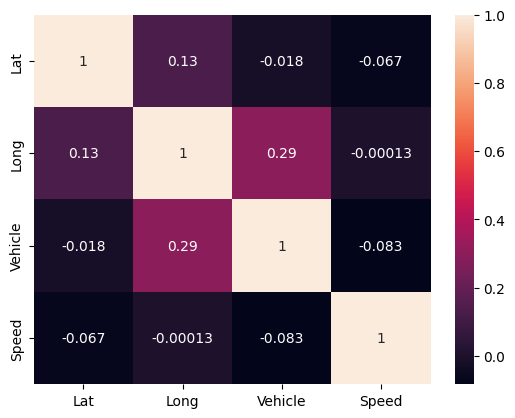

In [33]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Long', ylabel='Vehicle'>

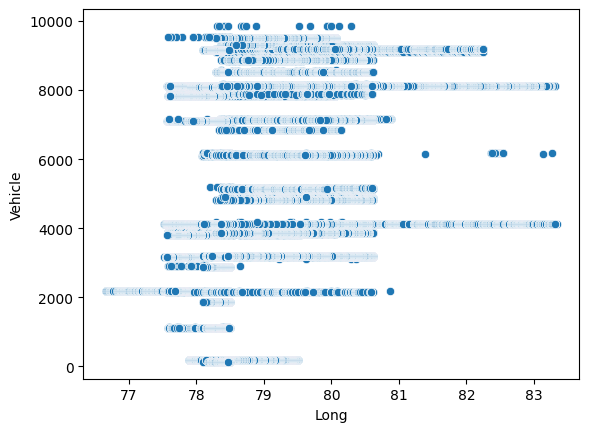

In [34]:
sns.scatterplot(data=df,x='Long',y='Vehicle')

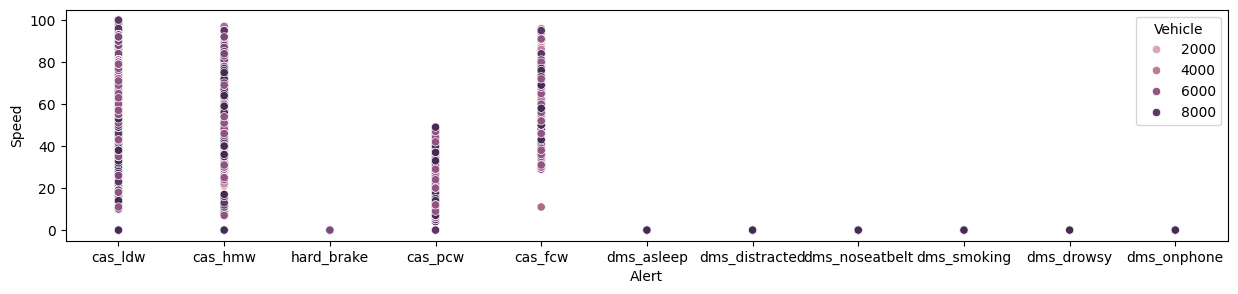

In [31]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=df, x='Alert', y='Speed', hue='Vehicle')
plt.show()

(i) Forward Collision Warning - FCW,

(ii) Pedestrian Collision Warning - PCW,


(iii) Headway Monitoring and Warning - HMW, and

(iv) Lane Departure Warning - LDW.

(i) Forward Collision Warning - FCW,

(ii) Pedestrian Collision Warning - PCW,

(iii) Headway Monitoring and Warning - HMW, and

(iv) Lane Departure Warning - LDW.

<Axes: xlabel='Alert', ylabel='Vehicle'>

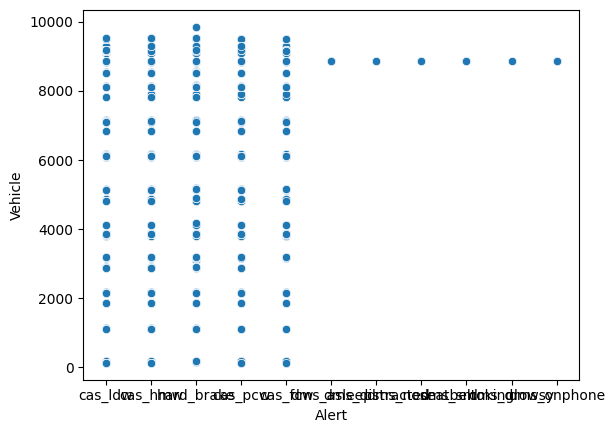

In [30]:
sns.scatterplot(data=df,x='Alert',y='Vehicle')

In [35]:
#exploring categorical values
df['Alert'].value_counts()

cas_ldw           159564
cas_hmw            27351
cas_fcw             1716
cas_pcw             1687
hard_brake          1487
dms_distracted       328
dms_noseatbelt        71
dms_asleep            43
dms_onphone            6
dms_smoking            4
dms_drowsy             1
Name: Alert, dtype: int64

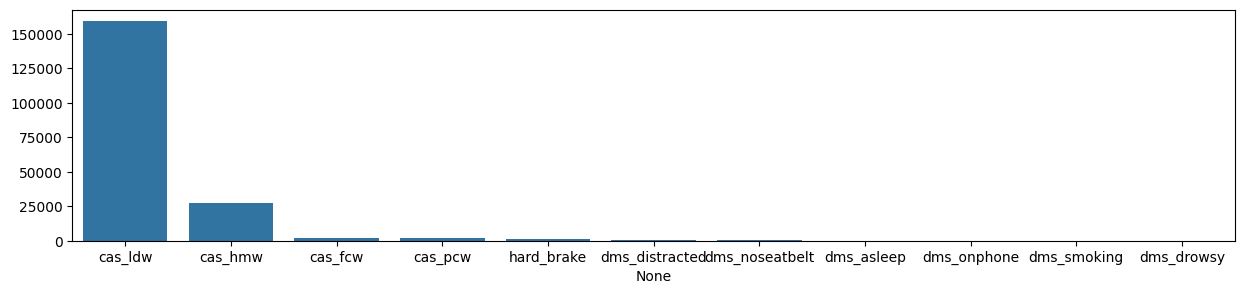

In [37]:
plt.figure(figsize=(15,3))
sns.barplot(x=df['Alert'].value_counts().index,
            y=df['Alert'].value_counts().values)
plt.show()

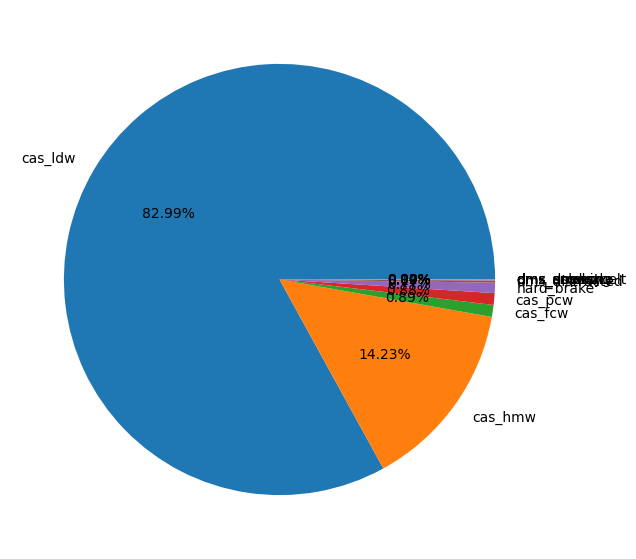

In [45]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Alert'].value_counts().values,
        labels=df['Alert'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

In [46]:
pd.crosstab(index=df['Alert'], columns=df['Vehicle'])

Vehicle,132.0,142.0,192.0,1103.0,1133.0,1153.0,1857.0,2143.0,2152.0,2153.0,...,9090.0,9097.0,9152.0,9192.0,9195.0,9293.0,9294.0,9501.0,9541.0,9857.0
Alert,,,,,,,,,,,,,,,,,,,,,
cas_fcw,16,0,27,33,0,0,15,9,12,1,...,0,43,31,39,54,0,92,15,0,0
cas_hmw,208,0,385,238,0,5,211,291,332,7,...,0,314,309,417,315,0,608,234,7,0
cas_ldw,1946,0,2939,1971,0,56,1765,372,1036,0,...,0,1782,1936,1988,1682,0,1974,2243,11,0
cas_pcw,8,0,13,33,0,0,16,9,42,1,...,0,64,17,34,54,0,45,12,0,0
dms_asleep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dms_distracted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dms_drowsy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dms_noseatbelt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dms_onphone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (63) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local

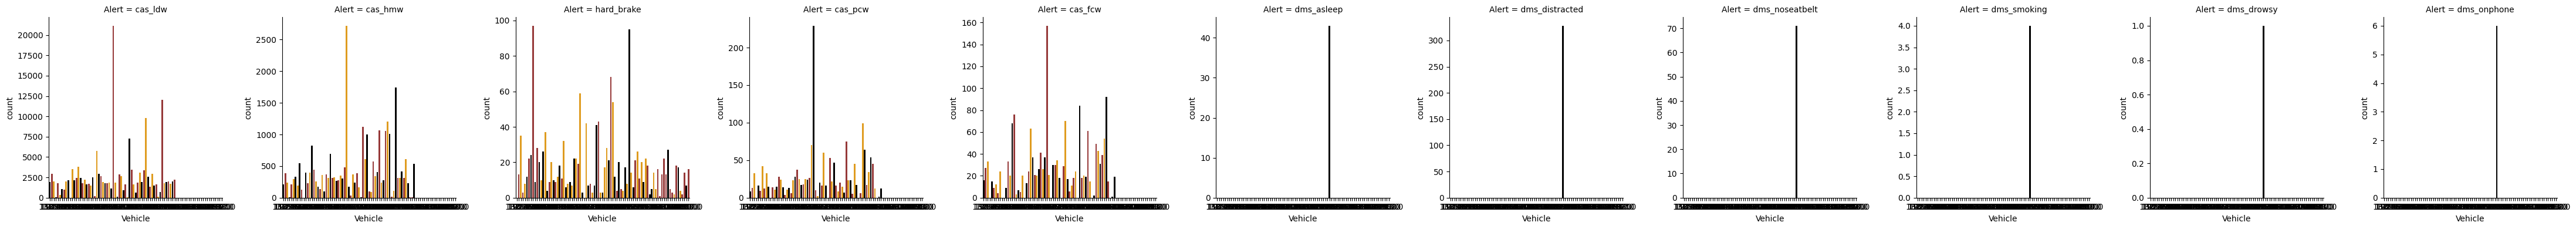

In [49]:
grid = sns.FacetGrid(data=df, col='Alert', height=4, aspect=1, sharey=False)

grid.map(sns.countplot, 'Vehicle', palette=['black', 'brown', 'orange'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (90) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local

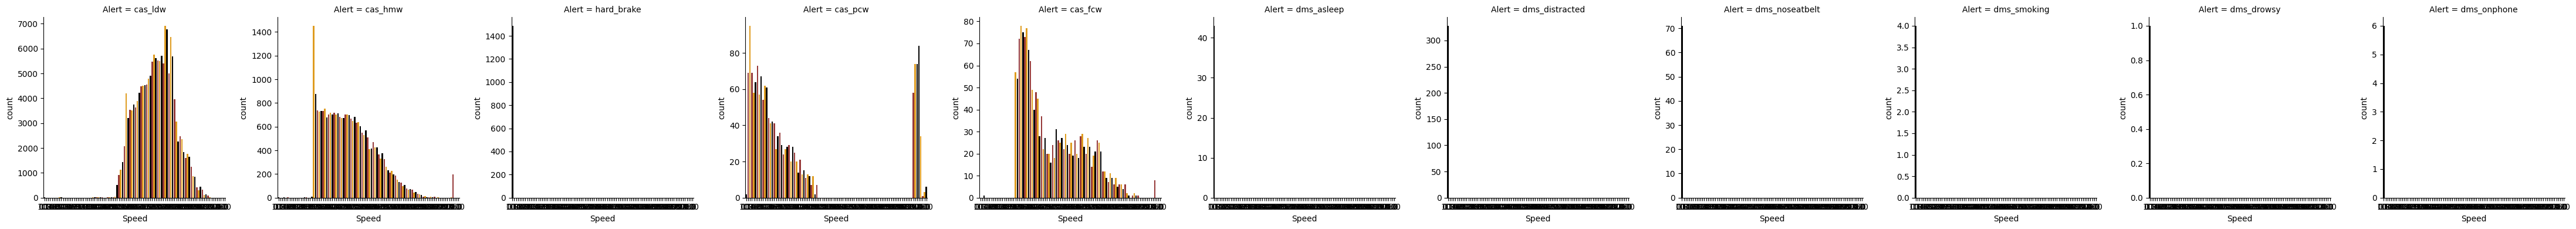

In [50]:
grid = sns.FacetGrid(data=df, col='Alert', height=4, aspect=1, sharey=False)

grid.map(sns.countplot, 'Speed', palette=['black', 'brown', 'orange'])
plt.show()

In [51]:
df.columns

Index(['Alert', 'Lat', 'Long', 'Vehicle', 'Speed'], dtype='object')

In [52]:
y=df['Alert']
x=df.drop('Alert',axis=1)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [56]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,pred)
accu

0.8946218662228232

In [59]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
from sklearn.metrics import accuracy_score
accu1=accuracy_score(y_test,pred1)
accu1

0.9208363674191199